## Optunaで学ぶベイズハイパーパラメータチューニング超入門 – 第6回: OptunaSearchCVを活用したscikit-learnモデルの最適化テクニック –

url: https://www.salesanalytics.co.jp/datascience/datascience196/

    ハイパーパラメータチューニングは、機械学習モデルの性能を最大限に引き出す鍵となるステップです。

    前回、複数の目的変数を持つマルチオブジェクティブチューニングの基本からParetoフロントの考え方、そして実際のコード例を通してその実装方法を学びました。

    url: https://www.salesanalytics.co.jp/datascience/datascience195/

    Optunaはこのプロセスを効率的に行うための強力なツールですが、scikit-learnとの統合はどうすればよいのでしょうか？

    今回は「OptunaSearchCVを活用したscikit-learnモデルの最適化テクニック」です。

    scikit-learnはPythonの機械学習ライブラリとして非常にポピュラーで、多くのデータサイエンティストや研究者が利用しています。

    Optunaとscikit-learnの連携方法として提供されているOptunaSearchCVの活用方法を中心に解説していきます。

## OptunaSearchCVとは？
### OptunaSearchCVの概要説明
    機械学習のモデリングにおいて、最適なハイパーパラメータを見つけるプロセスは非常に重要です。
    特にscikit-learnのようなライブラリを用いてモデリングする際、手動でハイパーパラメータを調整するのは時間がかかり、効率が良くありません。ここでOptunaSearchCVの出番です。

    OptunaSearchCVは、Optunaのハイパーパラメータ最適化機能をscikit-learnのAPIと統合したものです。

    具体的には、scikit-learnのGridSearchCVやRandomizedSearchCVと同様のインターフェースを持ちつつ、背後でOptunaのサンプリングやプルーニングの機能を利用して、ハイパーパラメータの最適化を行います。

## scikit-learnとの統合の利点
    OptunaSearchCVを使用する最大の利点は、scikit-learnの使い勝手の良さを維持しながら、Optunaの高度なハイパーパラメータ最適化テクニックを利用できる点にあります。

    具体的には以下のようなメリットが挙げられます。

    ・既存のコードの変更最小化: OptunaSearchCVはscikit-learnのインターフェースと互換性があるため、既存のコードを最小限の変更でOptunaの利点を享受できます。
    ・効率的なサンプリング: Optunaのサンプリング技術を背後で利用するため、ハイパーパラメータの探索空間を効率的にサンプルできます。
    ・プルーニングの活用: 不必要に悪い結果をもたらすトライアルを早期に打ち切り、計算リソースを節約することができます。

## 通常のハイパーパラメータチューニングとの違いは？
    OptunaによるハイパーパラメータチューニングとOptunaSearchCVの主な違いは、OptunaSearchCVがscikit-learnのAPIとの統合を強化している点にあります。



## インターフェースの統一性
    ・通常のOptuna
    Optunaの基本的なハイパーパラメータチューニングでは、目的関数を定義し、その中でモデルのトレーニングや評価を行います。
    この際、ハイパーパラメータはtrial.suggest_メソッドを用いてサンプリングします。

    ・OptunaSearchCV
    scikit-learnのGridSearchCVやRandomizedSearchCVと同じインターフェースを持ちます。
    このため、パラメータの探索空間を辞書として定義し、Estimator（モデル）とともにOptunaSearchCVに渡します。

## コードの変更の容易さ
    ・通常のOptuna
    Optunaの目的関数形式に書き換える必要があります。

    ・OptunaSearchCV
    scikit-learnのAPIとの互換性があるため、既存のGridSearchCVやRandomizedSearchCVを使用しているコードを簡単にOptunaSearchCVに置き換えることができます。

## 結果の取得
    ・通常のOptuna
    スタディオブジェクトから直接最適なトライアルやその他の情報を取得します。

    ・OptunaSearchCV
    GridSearchCVやRandomizedSearchCVと同様に、最適なハイパーパラメータやモデルのスコアをOptunaSearchCVオブジェクトの属性から取得できます。

## 使用場面
    ・通常のOptuna
    よりカスタマイズ可能で、非scikit-learnベースのモデルやライブラリ（例: TensorFlow, PyTorch）との統合も簡単です。

    ・OptunaSearchCV
    scikit-learnのEstimatorと連携する場面での利用が適しています。

## OptunaSearchCVの基本的な使い方
    OptunaSearchCVの使用方法は、scikit-learnのGridSearchCVやRandomizedSearchCVに非常に似ています。

    以下は、単純な分類問題にOptunaSearchCVを適用する例です。

In [1]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score
import optuna

# データの準備
iris = load_iris() # アヤメ（アイリス）のデータをロード
X = iris.data # 説明変数
y = iris.target # 目的変数

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
    )

# ハイパーパラメータの探索空間の定義
param_distributions = {
    'C': optuna.distributions.FloatDistribution(1, 10), # Cの探索範囲を1から10まで
    'gamma': optuna.distributions.FloatDistribution(1e-6, 1e-1, log=True) # gammaの探索範囲を10^-6から10^-1まで、対数スケール
}

clf = SVC() # サポートベクトルマシンの定義
optuna_search = OptunaSearchCV(
    clf,
    param_distributions,
    n_trials=100, # トライアル回数
    scoring='accuracy', # 評価指標
    n_jobs=-1 # 計算するコアの数
)

optuna_search.fit(X_train, y_train) # モデルの学習
y_pred = optuna_search.predict(X_test) # テストデータに対する予測

print("Best parameters: ", optuna_search.best_params_) # 最良のパラメータの表示
print("Test set accuracy: ", accuracy_score(y_test, y_pred)) # テストデータに対する予測精度の表示

# 以下、実行結果です。ハイパーパラメータの探索結果（Best parameters）と、テストデータの正答率（accuracy）を表示しています。

<ipython-input-2-99f608604bd8>:24: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2024-01-28 01:20:40,652] A new study created in memory with name: no-name-67a080bf-4add-4d17-8bc8-715c4b0ca61d
[I 2024-01-28 01:20:40,717] Trial 0 finished with value: 0.4391304347826087 and parameters: {'C': 3.4481776084952394, 'gamma': 0.0001427484760453466}. Best is trial 0 with value: 0.4391304347826087.
[I 2024-01-28 01:20:40,740] Trial 1 finished with value: 0.7517786561264822 and parameters: {'C': 7.2838962939149035, 'gamma': 0.00033306516397310133}. Best is trial 1 with value: 0.7517786561264822.
[I 2024-01-28 01:20:40,774] Trial 2 finished with value: 0.9458498023715414 and parameters: {'C': 1.6636983304270667, 'gamma': 0.0368229636936013}. Best is trial 2 with value: 0.9458498023715414.
[I 2024-01-28 01:20:40,791] Trial 3 finished with value: 0.9193675889328062 and parameters: {'C': 5.7150

Best parameters:  {'C': 9.416838780443127, 'gamma': 0.027207085506127392}
Test set accuracy:  1.0


    通常のOptunaによるハイパーパラメータチューニングをするときよりも、非常にシンプルになります。

## ハイパーパラメータ探索空間の定義方法
    ハイパーパラメータの探索空間は、モデルの学習に大きな影響を与えます。OptunaとOptunaSearchCVでは、非常に柔軟にこの探索空間を定義することが可能です。

    OptunaSearchCVでは、param_distributions引数を使用してハイパーパラメータの探索空間を定義します。

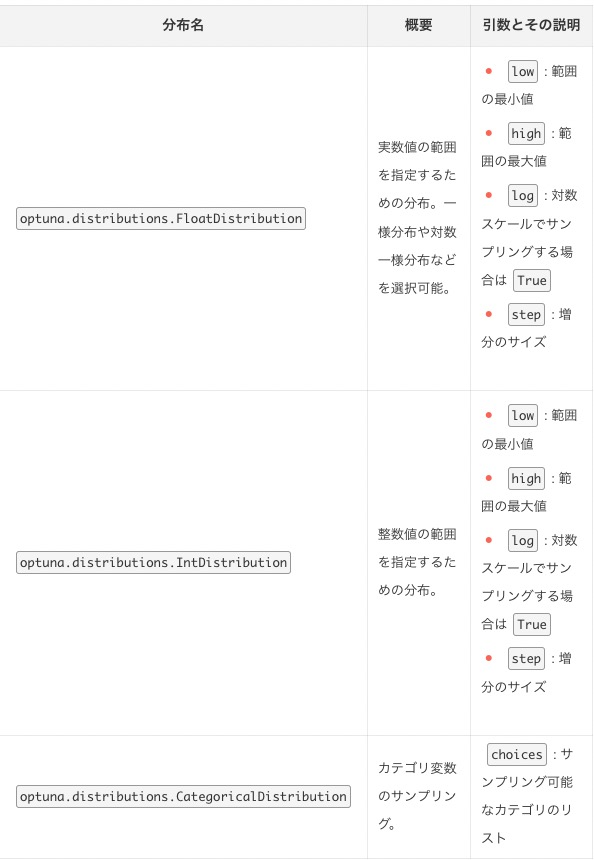

    以下は、OptunaSearchCVでの指定例です。

In [ ]:
# param_distributions = {
#     'C': optuna.distributions.FloatDistribution(1e-10, 1e+10, log=True),
#     'gamma': optuna.distributions.FloatDistribution(1e-10, 1e+1, log=True),
#     'kernel': optuna.distributions.CategoricalDistribution(['linear', 'poly', 'rbf', 'sigmoid'])
# }

    このように、OptunaSearchCVでは、Optunaの分布を直接指定して、非常に柔軟なハイパーパラメータ探索が可能です。

## OptunaSearchCVの高度な設定とテクニック
    OptunaSearchCVは、基本的なハイパーパラメータのチューニングだけでなく、高度な設定やテクニックも提供しています。
    この章では、プルーニングの活用方法や交差検証との連携について詳しく探ることで、OptunaSearchCVの可能性をさらに引き出す方法を学びます。

## プルーニングの活用方法
    Optunaの強力な機能の1つが「プルーニング」です。これは、最適化中に非効率的なトライアルを早期に打ち切る技術で、計算リソースを節約するとともに、全体の最適化プロセスを加速します。

    OptunaSearchCVを使用する場合、プルーニングはpruner引数を指定することで簡単に活用できます。例えば、メディアンプルーナを使用する場合、次のように設定します。

In [ ]:
# from optuna.integration import OptunaSearchCV
# from optuna.pruners import MedianPruner

# pruner = MedianPruner()
# search = OptunaSearchCV(estimator, param_distributions, pruner=pruner)

## 交差検証 (Cross-validation) との連携
    OptunaSearchCVは、scikit-learnのGridSearchCVやRandomizedSearchCVと同様に、交差検証をサポートしています。
    これにより、モデルの性能評価がより信頼性を持つものとなります。

    デフォルトでは、3-fold交差検証が行われますが、cv引数を用いて、異なる分割数（cv=10）やカスタム分割ロジックを持つStratifiedKFoldなどの
    交差検証ストラテジを指定（cv=StratifiedKFold(…)）することもできます。

In [ ]:
# from sklearn.model_selection import StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# search = OptunaSearchCV(estimator, param_distributions, cv=cv)

    ちなみに、StratifiedKFoldは、scikit-learnの交差検証（Cross-validation）ストラテジの1つで、特に分類問題において有用です。

    具体的には、StratifiedKFoldは次のように動作します。

    1.元のデータセットのクラスの比率を確認します。
    2.データセットをK個の分割に分けますが、このとき各分割が元のクラスの比率を尊重するようにします。

    StratifiedKFoldの利点です。

    ・不均衡なクラス分布を持つデータセットでのモデルの評価に非常に役立ちます。これは、少数のクラスがテストデータセットに偏らないようにするためです。
    ・実際のモデルの性能をより正確に推定することができます。

    例えば、2つのクラス（ラベル0と1）を持つデータセットがある場合、StratifiedKFoldを使用すると、各分割での0と1の比率が、元のデータセットの比率とほぼ同じになるようにします。

## OptunaSearchCVの実践例
### 実際のデータセットを用いたモデルの最適化
    scikit-learnのサンプルデータセット、例えばirisやdiabetesを使用して、OptunaSearchCVを活用したハイパーパラメータチューニングの手順を紹介します。

    このデータセットを用いて、例えば決定木やランダムフォレストといったモデルの最適なハイパーパラメータを見つける過程を示します。

    1.データセットの読み込みと前処理
    2.OptunaSearchCVの設定（目的関数の定義、探索空間の指定など）
    3.モデルの最適化実行

    最適化が完了した後、結果をどのように解釈し、モデルの性能をどのように評価するかが重要です。

    OptunaSearchCVの結果を取得する方法、ベストなハイパーパラメータの値やその性能を確認する方法を紹介します。

    1.ベストなハイパーパラメータの取得
    2.性能評価の指標に基づく評価
    3.結果の視覚化

## 分類問題（アヤメのデータセット）例
    このiris（アヤメ）のデータセットは、3つの異なるアイリスの種類（setosa, versicolor, virginica）の各々に対する50のサンプルからなります。
    各サンプルには4つの特徴量（ガクの長さ、ガクの幅、花びらの長さ、花びらの幅）があります。アヤメの種類を予測するタスクが一般的です。

    以下、コードです。

In [3]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# データの読み込み
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# パラメータの探索空間の定義
param_distributions = {
    'n_estimators': optuna.distributions.IntDistribution(2, 150),
    'max_depth': optuna.distributions.IntDistribution(1, 32, log=True)
}

# モデルの定義
clf = RandomForestClassifier()

# OptunaSearchCVの設定
optuna_search = OptunaSearchCV(
    clf,
    param_distributions,
    n_trials=100,
    scoring="accuracy",
    cv=3
)

# モデルの最適化実行
optuna_search.fit(X_train, y_train)

# 最適化後のベストなパラメータとスコアの表示
print(f"Best parameters: {optuna_search.best_params_}")
print(f"Best cross-validation score: {optuna_search.best_score_:.3f}")

# テストデータに対する評価
test_score = optuna_search.score(X_test, y_test)
print(f"Test accuracy: {test_score:.3f}")

# 最適化されたモデルの特徴を取得して表示
best_estimator = optuna_search.best_estimator_
print(f"Best estimator: {best_estimator}")

# さらに、Optunaのスタディオブジェクトを取得して、詳細な最適化の結果を分析することも可能です。
study = optuna_search.study_
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

# Optunaのビジュアライゼーション機能を使って、探索の過程を視覚的に確認することもできます。
# 以下は、すべてのトライアルの結果をプロットする例です。
optuna.visualization.plot_optimization_history(study)

<ipython-input-3-af983f1eb8b3>:23: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2024-01-28 01:28:49,071] A new study created in memory with name: no-name-a31a7ac3-3da5-4d33-8fd7-d80768a9f7e2
[I 2024-01-28 01:28:49,688] Trial 0 finished with value: 0.9371740161213845 and parameters: {'n_estimators': 37, 'max_depth': 1}. Best is trial 0 with value: 0.9371740161213845.
[I 2024-01-28 01:28:50,563] Trial 1 finished with value: 0.9374110953058322 and parameters: {'n_estimators': 99, 'max_depth': 22}. Best is trial 1 with value: 0.9374110953058322.
[I 2024-01-28 01:28:51,003] Trial 2 finished with value: 0.9461830251303937 and parameters: {'n_estimators': 100, 'max_depth': 3}. Best is trial 2 with value: 0.9461830251303937.
[I 2024-01-28 01:28:51,662] Trial 3 finished with value: 0.9551920341394027 and parameters: {'n_estimators': 119, 'max_depth': 28}. Best is trial 3 with value: 0.9

Best parameters: {'n_estimators': 119, 'max_depth': 28}
Best cross-validation score: 0.955
Test accuracy: 1.000
Best estimator: RandomForestClassifier(max_depth=28, n_estimators=119)
Number of finished trials: 100
Best trial:
  Value: 0.9551920341394027
  Params: {'n_estimators': 119, 'max_depth': 28}


    このコードを実行することで、irisデータセット上でのランダムフォレストモデルのベストなハイパーパラメータが得られます。
    OptunaSearchCVは、内部で指定されたトライアル数（この例では100回）だけハイパーパラメータの組み合わせを試し、最も良いスコアを持つ組み合わせを選択します。

    さらに、最適化されたモデルのテストデータに対する正確性を計算して表示します。
    さらに、最適化されたモデルの具体的な特徴や、Optunaのスタディオブジェクトを通じて、ハイパーパラメータ探索の詳細な結果を取得・表示します。
    最後に、Optunaのビジュアライゼーション機能を使用して、探索の過程を視覚的に確認することができます。



## 回帰問題（糖尿病のデータセット）例
    この糖尿病（diabetes）のデータセットは、糖尿病患者の情報を基にした10の特徴量を持つ、442人の糖尿病患者のデータです。目的変数は、1年後の疾患進行の定量的測定値です。

    以下、コードです。

In [4]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# diabetes データセットの読み込み
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OptunaSearchCVを定義
param_distributions = {
    'n_estimators': optuna.distributions.IntDistribution(2, 150),
    'max_depth': optuna.distributions.IntDistribution(1, 32),
    'min_samples_split': optuna.distributions.FloatDistribution(0.1, 1),
    'min_samples_leaf': optuna.distributions.FloatDistribution(0.1, 0.5),
    'max_features': optuna.distributions.CategoricalDistribution(['auto', 'sqrt', 'log2'])
}

clf = RandomForestRegressor(random_state=42)
optuna_search = OptunaSearchCV(
    clf, param_distributions,
    n_trials=100,
    cv=3,
    random_state=42,
    verbose=2
)

# 最適化の実行
optuna_search.fit(X_train, y_train)

# テストデータに対する評価
y_pred = optuna_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")

# 最適化されたモデルの特徴を表示
best_estimator = optuna_search.best_estimator_
print(f"Best estimator: {best_estimator}")

# Optunaのスタディオブジェクトを取得し、詳細な最適化の結果を分析
study = optuna_search.study_
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

# 探索の過程を視覚的に確認
optuna.visualization.plot_optimization_history(study)

<ipython-input-4-f248b7563619>:24: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2024-01-28 01:30:40,952] A new study created in memory with name: no-name-70bb4bba-8f4d-4be0-a0b0-b6e028c0f039
[I 2024-01-28 01:30:40,954] Searching the best hyperparameters using 353 samples...
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegress

Test MSE: 3053.615
Best estimator: RandomForestRegressor(max_depth=17, max_features='sqrt',
                      min_samples_leaf=0.10022239302145346,
                      min_samples_split=0.20650593234907547, n_estimators=52,
                      random_state=42)
Number of finished trials: 100
Best trial:
  Value: 0.4148177112674587
  Params: {'n_estimators': 52, 'max_depth': 17, 'min_samples_split': 0.20650593234907547, 'min_samples_leaf': 0.10022239302145346, 'max_features': 'sqrt'}


    このコードでは、diabetes データセットを用いて、RandomForestRegressor モデルのハイパーパラメータチューニングを行います。
    OptunaSearchCVを使用することで、簡単かつ効果的にハイパーパラメータの最適化が行えます。最後に、Optunaのビジュアライゼーション機能を利用して、探索の過程を視覚的に確認することができます。

## まとめ
    今回は、OptunaSearchCVを使ったscikit-learnモデルのハイパーパラメータ最適化について学びました。

    ・OptunaSearchCVの基本的な使い方とその利点。
    ・ハイパーパラメータの探索空間の定義方法。
    ・OptunaSearchCVでのプルーニングや交差検証との連携方法。
    ・実際のデータセットを用いたモデルの最適化の実践例。

    OptunaSearchCVは、Optunaの強力なハイパーパラメータチューニングの機能をscikit-learnのモデルに簡単に適用するためのツールです。
    これにより、モデルの性能を向上させるためのハイパーパラメータを効率的に探索することができます。